# Load libraries

In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import shuffle
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import networkx as nx
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load data

In [2]:
blue=pd.read_csv('fad_blue_rnadata.csv').rename(columns={"Unnamed: 0": "Cells"})
blue.set_index("Cells", drop=True,inplace=True)
blue=blue.T
#^transpose because we want genes to be features

In [3]:
idx=blue.index 
y=blue['BlueFP']
x=blue.drop(['BlueFP'],axis=1)
#get top 200 genes from linear reg
genestokeep=pd.read_csv('data/top200_genes.csv').drop("Unnamed: 0",axis=1)['Genes']
x2=x.loc[:, x.columns.isin(genestokeep)]
genes=x2.columns
#set x and y
x1=x2.to_numpy()

# Parameter sweep

Simple way of finding good parameters for each tree/forest

In [4]:
samp_split=[5,6,7,8] 
min_leaves=[2,3,4,5]
max_feat=[None]
scores=0
MSEs=999999999999999
for n in samp_split:
    for m in min_leaves:
        for o in max_feat:
            #split into train and test
            X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.2) 
            reg = RandomForestRegressor(min_samples_split=n, min_samples_leaf=m,max_features=o)
            reg.fit(X_train,y_train)
            scoretemp=reg.score(X_test,y_test) 
            y_pred=reg.predict(X_test)
            MSE_temp=np.sqrt(mean_squared_error(y_test,y_pred))#actually RMSE 
            print('min samples split value: '+str(n))
            print('min samples leaf value: '+str(m))
            print('max features value: '+str(o))
            print('Score: '+str(scoretemp))
            print('RMSE: '+str(MSE_temp))
            print()
            if MSEs>MSE_temp:
                MSEs=MSE_temp
                scores=scoretemp
                best_a=n
                best_b=m
                besto=o
                best_params=reg.get_params()
print('Best: ')
print('Score (D^2): '+str(scores)) 
print('Root mean squared error: '+str(MSEs)) 
print('Min samples split: '+str(best_a)) 
print('Min samples leaf: '+str(best_b)) 
print('Max features: '+str(besto)) 

min samples split value: 5
min samples leaf value: 2
max features value: sqrt
Score: 0.16999208887699557
RMSE: 6.634596878485307

min samples split value: 5
min samples leaf value: 2
max features value: None
Score: 0.255560782516703
RMSE: 6.696396579799728

min samples split value: 5
min samples leaf value: 3
max features value: sqrt
Score: 0.17602289181957298
RMSE: 6.902419983167428

min samples split value: 5
min samples leaf value: 3
max features value: None
Score: 0.14578677262892692
RMSE: 6.255711284299214

min samples split value: 5
min samples leaf value: 4
max features value: sqrt
Score: 0.15222489286108165
RMSE: 6.669876922488455

min samples split value: 5
min samples leaf value: 4
max features value: None
Score: 0.2513538180127184
RMSE: 5.844828684541017

min samples split value: 5
min samples leaf value: 5
max features value: sqrt
Score: 0.11650540774610207
RMSE: 7.33851949944792

min samples split value: 5
min samples leaf value: 5
max features value: None
Score: 0.1633978

In [5]:
best_params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

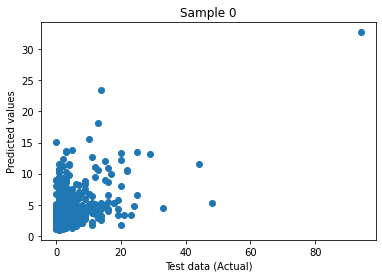

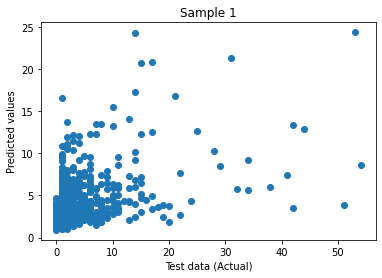

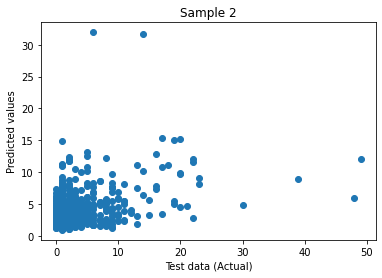

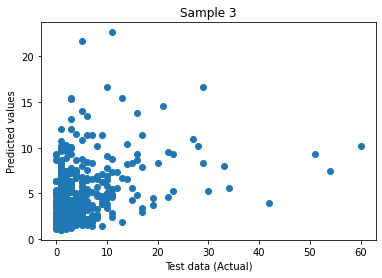

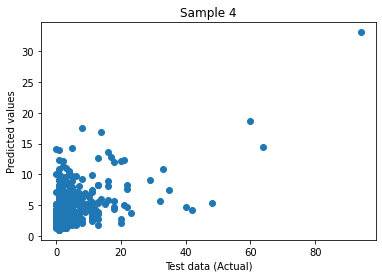

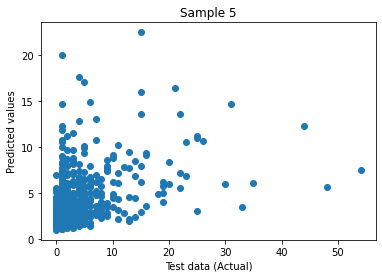

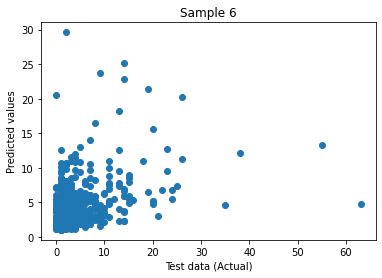

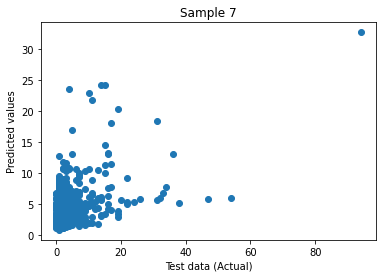

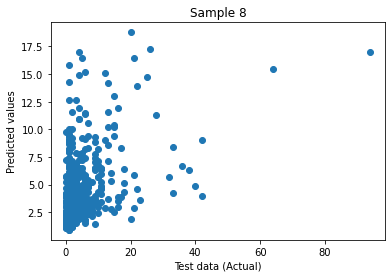

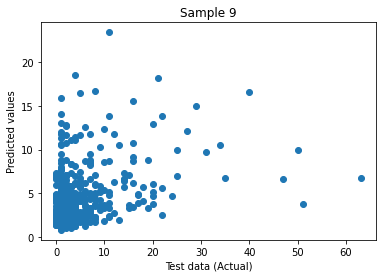

Average score (D^2): 
0.1803421652466763
Average root mean squared error: 
5.626626981379722


In [6]:
numruns=10
scores=0
MSEs=0
for n in range(numruns):
    #split into train and test
    X_train2, X_test2, y_train, y_test = train_test_split(x1, y, test_size=0.2)
    scaler = preprocessing.StandardScaler().fit(X_train2)
    #scale using x_train model for both train & test
    X_train = scaler.transform(X_train2) 
    X_test= scaler.transform(X_test2) 
    reg = RandomForestRegressor(min_samples_split=best_a, min_samples_leaf=best_b,max_features=besto)
    reg.fit(X_train,y_train)
    scoretemp=reg.score(X_test,y_test)
    scores+=scoretemp
    y_pred=reg.predict(X_test)
    MSEs+=np.sqrt(mean_squared_error(y_test,y_pred))#actually RMSE
    plt.scatter(y_test,y_pred)
    plt.xlabel('Test data (Actual)')
    plt.ylabel('Predicted values')
    plt.title('Sample '+str(n)) 
    plt.show()
print('Average score (D^2): ')
print(scores/numruns)
print('Average root mean squared error: ')
print(MSEs/numruns)